# Functional API

- The Keras functional API is a way to create models that are more flexible than the keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

- The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [83]:
inputs = layers.Input((32, 32, 3))
l1 = layers.Conv2D(32, 5, activation="relu", name="conv2d_1")(inputs)
l2 = layers.Conv2D(32, 5, activation="relu", name="conv2d_2")(l1)
l3 = layers.Flatten(name="flatten")(l2)
l4 = layers.Dense(2, name="output")(l3)

model = keras.Model(
    inputs=inputs,
    outputs=l4
)

In [84]:
model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 output (Dense)              (None, 2)                 36866     
                                                                 
Total params: 64,930
Trainable params: 64,930
Non-trainable params: 0
_________________________________________________________________


In [85]:
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz

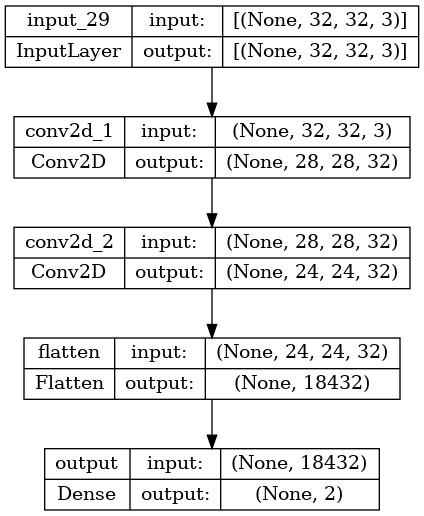

In [86]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

## using same graph of layers to define multiple models

- In the functional API, models are created by specifying their inputs and outputs in a graph of layers. That means that a single graph of layers can be used to generate multiple models.

In the example below, you use the same stack of layers to instantiate two models: an `encoder` model that turns image inputs into 16-dimensional vectors, and an end-to-end `autoencoder` model for training.

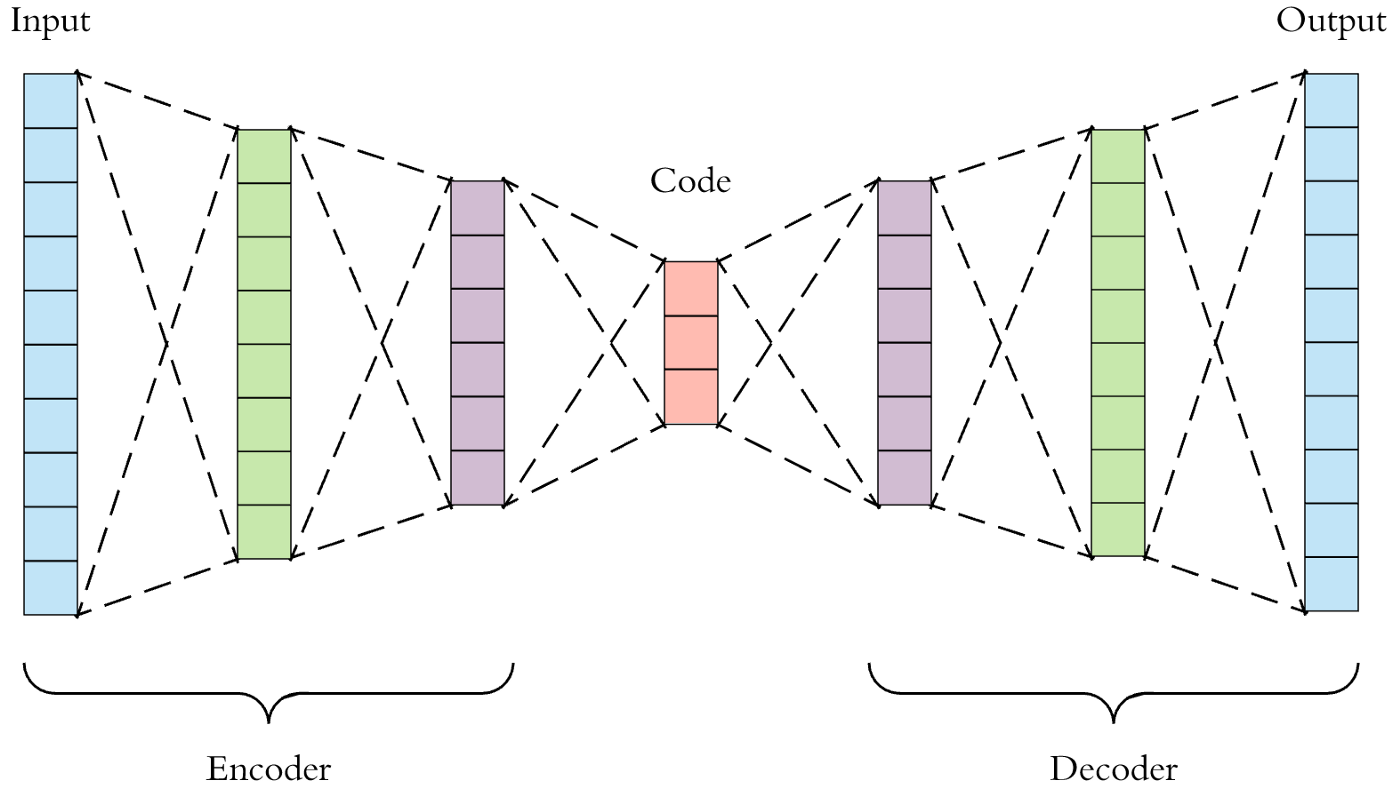

## Note: 
- In sequential model, we don't have to add Input layer, but if you want to get the summary() then you have to add the input layer.
- In function API, input layer is mandatory, however you can pass None for the input shape (at least last dim value should be provided i.e num of channal for CNN) to create dynamic input model.

In [112]:
encoder_input = layers.Input((None, None, 1), name="image")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(
    inputs=encoder_input,
    outputs=encoder_output
)
# encoder.summary()

x = tf.Variable(tf.ones([1, 28, 28, 1]))
# x.shape
encoder(x).shape

TensorShape([1, 16])

In [104]:
# Similar to the above layer but with fixed input shape
encoder_input = layers.Input((28, 28, 1), name="image")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(
    inputs=encoder_input,
    outputs=encoder_output
)

In [9]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

In [10]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

auto_encoder = keras.Model(
    inputs=encoder_input,
    outputs=decoder_output
)

In [11]:
auto_encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

### Checking Conv2DTransponse

In [2]:
conv_trans = layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding="valid", output_padding=1)
# output shape = s(n-1) + k - 2p + out_pad
#  = 2 (2-1)+3-2*0 + 1
#  = 2 + 3 + 1
#  = 6

In [16]:
x = tf.ones((1, 2, 2, 1))
x.shape

TensorShape([1, 2, 2, 1])

In [17]:
conv_trans(x).shape

TensorShape([1, 6, 6, 1])

In [28]:
conv_2d = layers.Conv2D(filters=1, kernel_size=3, strides=1, padding="same")

In [29]:
x = tf.ones((1, 4, 4, 1))
conv_2d(x).shape

TensorShape([1, 4, 4, 1])

Padding = "valid" --> no padding

- In valid padding, no padding is added to the input tensor. It means that the convolutional kernel is applied only to the valid positions of the input, and the output size will be smaller than the input size.
- output_shape = ((input_shape - kernel_size + 1) / stride)
- Here, "/" represents integer division, where the decimal part is truncated.

```
   inputs:         1  2  3  4  5  6  7  8  9  10 11 (12 13)
                  |________________|                dropped
                                 |_________________|

```


padding = "same" -->zero padding

- In same padding, the necessary amount of padding is added to the input tensor to ensure that the output has the same spatial dimensions as the input only if stride = 1.
- output_shape = ceil(input_shape / stride)

```
               pad|                                      |pad
   inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0
               |________________|
                              |_________________|
                                             |________________|
```

## Nasted Model

- **The model can be nested**: a model can contain sub-models (since a model is just like a layer). A common use case for model nesting is ***ensembling***. For example, here's how to ensemble a set of models into a single model that averages their predictions


In [92]:
def get_model(x):
    inputs = layers.Input((128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

In [93]:
model_1 = get_model(x)
model_2 = get_model(x)
model_3 = get_model(x)

inputs = layers.Input((128,))
out_1 = model_1(inputs)
out_2 = model_2(inputs)
out_3 = model_3(inputs)
out = layers.average([out_1, out_2, out_3])
ensemble_model = keras.Model(inputs=inputs, outputs=out)

In [77]:
x = tf.Variable(tf.ones([1, 128]))
print(x.shape)
ensemble_model(x)

(1, 128)


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.3980988]], dtype=float32)>

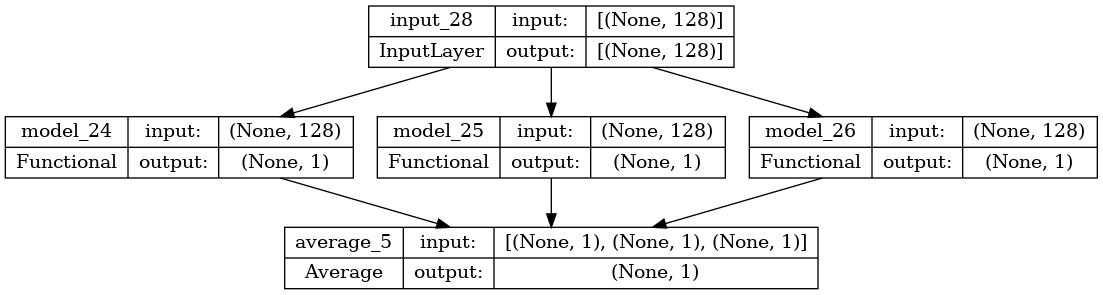

In [80]:
keras.utils.plot_model(ensemble_model, "multi_input_and_output_model.png", show_shapes=True)

### Multiple Inputs and outputs [more](https://www.tensorflow.org/guide/keras/functional_api#models_with_multiple_inputs_and_outputs)
The functional API makes it easy to manipulate multiple inputs and outputs. This cannot be handled with the Sequential API.

In [115]:
input_1 = layers.Input((None,))
input_2 = layers.Input((None,))
input_3 = layers.Input((4))

emb_1 = layers.Embedding(1000, 64)(input_1)
emb_2 = layers.Embedding(1000, 64)(input_2)

lstm_1 = layers.LSTM(128)(emb_1)
lstm_2 = layers.LSTM(32)(emb_2)

concat = layers.concatenate([lstm_1, lstm_2, input_3])

out_1 = layers.Dense(1)(concat)
out_2 = layers.Dense(4)(concat)

model = keras.Model(
    inputs=[input_1, input_2, input_3],
    outputs=[out_1, out_2]
)

2023-07-16 22:33:23.733977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-16 22:33:23.735128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-16 22:33:23.736288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [116]:
model.summary()

Model: "model_53"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_50 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 input_51 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, None, 64)     64000       ['input_50[0][0]']               
                                                                                                  
 embedding_5 (Embedding)        (None, None, 64)     64000       ['input_51[0][0]']               
                                                                                           

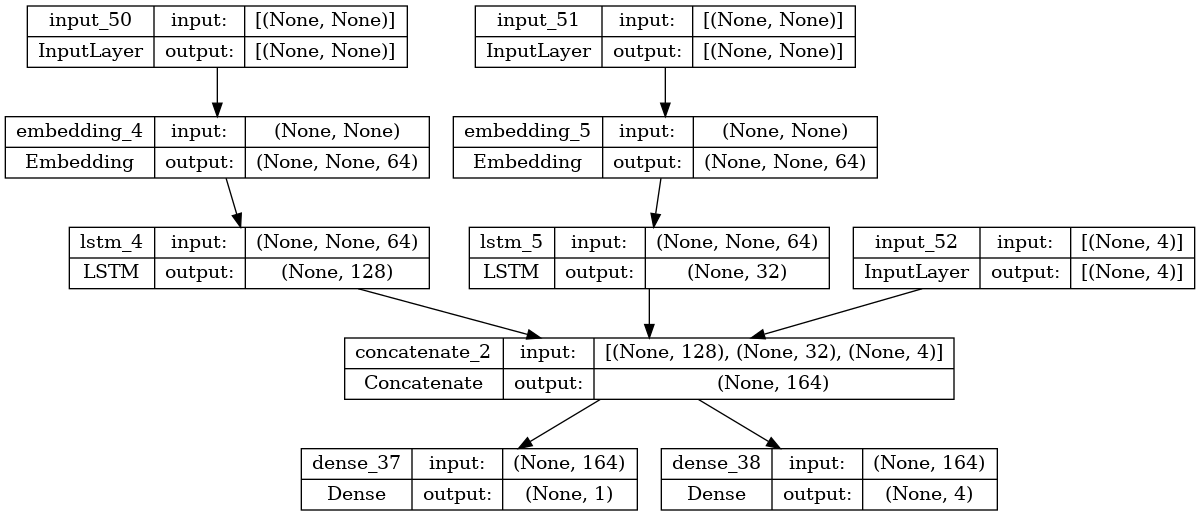

In [117]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

## Shared Layers
- Another good use for the functional API are models that use shared layers. Shared layers are layer instances that are reused multiple times in the same model -- they learn features that correspond to multiple paths in the graph-of-layers.
- Shared layers are often used to encode inputs from similar spaces (say, two different pieces of text that feature similar vocabulary). They enable sharing of information across these different inputs, and they make it possible to train such a model on less data. If a given word is seen in one of the inputs, that will benefit the processing of all inputs that pass through the shared layer.

In [118]:
shared_embedding = layers.Embedding(1000, 100)

text_input1 = layers.Input((None, ))
text_input2 = layers.Input((None, ))

out_1 = shared_embedding(text_input1)
out_2 = shared_embedding(text_input2)

model = keras.Model(
        inputs=[text_input1, text_input2],
        outputs=[out_1, out_2]
)

In [119]:
model.summary()

Model: "model_54"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_53 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 input_54 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, None, 100)    100000      ['input_53[0][0]',               
                                                                  'input_54[0][0]']               
                                                                                                  
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
___________________

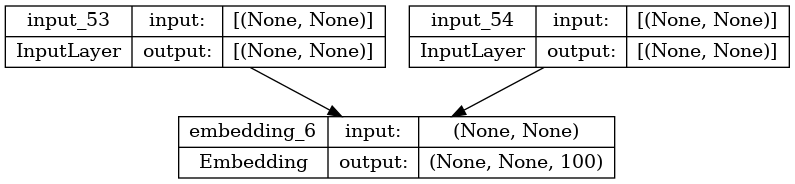

In [120]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

### Note:
- All models in the keras API can interact with each other, whether they're Sequential models, functional models, or subclassed models that are written from scratch.
